In [1]:
# Импортируем в Блок требуемые библиотеки

# Блок основных библиотек
import pandas as pd
import numpy as np
import math

# Блок графических пакетов
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly
from plotly.subplots import make_subplots
import pylab
%matplotlib inline
sns.set_style('darkgrid')

# Блок библиотеки sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_errorr, mean_squared_error, 2_score # метрика для проверки 
from sklearn.model_selection import cross_val_score, cross_val_predict

import statsmodels.api as sm 

# Блок для создания нейронной сети
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AlphaDropout, Dense, Dropout, 
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Блок исключеия вывода предупреждающих ошибок
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings("ignore")

In [2]:
# Блок импорта созданых функций для проекта из папки modules_def
%run ./modules_def/optimize_memory_usage.ipynb

In [ ]:
# Блок создания нейронной сети, которая будет рекомендовать:
#'ratio_filler_matrix' RFM - Соотношение матрица-наполнитель 

In [3]:
# Версия tensorflow
print(tf.__version__)

2.10.0


In [ ]:
# Нейронная сеть для предсказания соотношения матрица-наполнитель

!!!!!! http://mei06.narod.ru/sem7/iis/shpora/page2_9.htm
Многослойные нейронные сети прямого распространения (МНСПР)
Выбор параметров сети.

Элементы нейронной сети
Входной слой: этот слой принимает входные функции. Он предоставляет информацию из внешнего мира в сеть, 
на этом уровне вычисления не выполняются, узлы здесь просто передают информацию (функции) скрытому слою.

Скрытый слой / слои-  это слой не подвергается воздействию внешнего мира, он являются частью абстракции, 
предоставляемой любой нейронной сетью. Скрытый слой выполняет все виды вычислений над объектами, 
введенными через входной слой, и передает результат на выходной слой.

Выходной уровень: этот уровень выводит информацию, полученную сетью, во внешний мир.

В настоящее время нет никаких жестких правил ни для выбора количества скрытых слоев, 
ни для выбора количества нейронов в них. Хотя существуют ограничения, помогающие принимать решения.
Критерии выбора количество слоев.
1) Если функция определена на конечном множестве точек, то 3-ехслойный перцептрон способен ее апроксимировать.
2) Если функция непрерывна и определена на компактной области, то 3-ехслойный перцептрон способен ее апроксимировать.
3) Остальные функции, которым могут быть обучены нейронные сети, могут быть апроксимированы 4-ехслойным перцетроном.
Таким образом, теоретически максимальное количество слоев, которое необходимо – четыре, или два скрытых слоя. 

Вывод: C учетом наших исследований по корреляции (фактически ее отсутствия)
принимаем 3 вариант построения нейронной сети, т.е. у нас будет 4 слоя:

Количество нейронов в скрытых слоях.
Слишком малое количество – и сеть не сможет обучиться. 
Слишком большое повлечет за собой увеличение времени обучения сети до фактически нереального значения. 
Также это может привести к переобученности сети (overfitting), проявляющейся в том, 
что сеть будет прекрасно работать на обучающей выборке, но очень плохо на входных примерах не входящих в нее.

Это происходит из-за того, что сеть будет обладать избыточными способностями к обучению
и наряду со значительными для данной задачи факторами будет учитывать черты, 
характерные лишь для данной обучающей выборки.

Однако, существуют эвристические правила выбора количества нейронов в скрытых слоях. 
Одним из таких правил является правило  геометрической пирамиды (geometric pyramid rule).  
Для 3-ех слойного перцептрона, по этому правилу ,число нейронов скрытого слоя  вычисляетмя по следующей формуле:
k = sqrt(n * m)                      
где
k – число нейронов в скрытом слое,
n – число нейронов во входном слое;
m –  число нейронов в выходном слое.
Для 4-ехслойного перцептрона число нейронов вычисляется несколько сложнее:
r = sqrt^3(n/m)( кубический корень)
где 
к1= m * r2 - число нейронов в первом скрытом слое;
к2 = m * r - число нейронов во втором скрытом слое.   

In [4]:
# У нас 1  имеется целевая переменная - 'ratio_filler_matrix' RFM - Соотношение матрица-наполнитель
# Следовательно, у нас будет 1 нейрон на выходе
# На входе  DF у нас остаются 12 признаков.
# Следоватьльно у нас на входе нейроной сети будет  12 нейронов.  

# Проведем расчет количества нейронов в 2 - х скрытых слоях по правилу  геометрической пирамиды: 
# k -                 # число нейронов в скрытом слое
n = 12              # число нейронов во входном слое
m = 1               # число нейронов в выходном слое 
r = (n/m) **(1.0/3.0)
k1 = m * r**2       # число нейронов в 1-м скрытом слое
k2 = m * r          # число нейронов во 2-м скрытом слое

In [5]:
print('число нейронов во входном слое - ', n)
print('число нейронов в выходном слое - ', m)
print('число нейронов в 1-м скрытом слое - ', math.ceil(k1)) # округляем в большую сторону
print('число нейронов во 2-м скрытом слое - ', math.ceil(k2)) # округляем в большую сторону

число нейронов во входном слое -  12
число нейронов в выходном слое -  1
число нейронов в 1-м скрытом слое -  6
число нейронов во 2-м скрытом слое -  3


Выбор Активационных функций

Функция активации решает, следует ли активировать нейрон или нет, путем вычисления взвешенной суммы 
и дальнейшего добавления к ней смещения. 
Целью функции активации является введение нелинейности в выходной сигнал нейрона.

Варианты функции активации
Линейная функция
Использование: Функция линейной активации используется только в одном месте, т.Е. на выходном уровне.

Функция RELU
Это означает выпрямленную линейную единицу. Это наиболее широко используемая функция активации. 
В основном реализованы в скрытых слоях нейронной сети.
Природа: - нелинейная, что означает, что мы можем легко распространять ошибки в обратном направлении и иметь несколько слоев нейронов, активируемых функцией ReLU.
Использует: - ReLU менее дорогостоящий в вычислительном отношении, чем tanh и sigmoid, поскольку он включает в себя более простые математические операции. Одновременно активируется только несколько нейронов, что делает сеть разреженной, что делает ее эффективной и простой для вычислений.
Проще говоря, RELU обучается намного быстрее, чем sigmoid и функция Tanh.

Функция активации SELU
масштабированная экспоненциальная линейная единица или функцию активации SELU
масштабируемые экспоненциальные линейные единицы" (SELU)
Эта функция активации, которая обладает свойствами самонормализации, гарантирует, 
что все выходные данные будут нормализованы без явного добавления слоя нормализации в вашу модель. 
Что лучше, так это то, что его можно использовать относительно легко и что он обеспечивает адекватные результаты,
Important:
1. When using SELU, the LecunNormal() initializer must be used -  kernel_initializer='lecun_normal'
2. When using SELU and Dropout, AlphaDropout() must be used

Масштабируемая экспоненциальная линейная единица или функция активации SELU может использоваться для объединения
эффектов RELU и пакетной нормализации,что устраняет необходимость в использовании BatchNorm.

In [40]:
# Функции для обработки результатов работы нейронной сети

# Функция model_loss_plot построения графика потерь модели на тренировочной и тестовой выборках
# Параметры, передаваемые в функцию:
# model_history- наша модель
# graf_name_path - путь записи в директорию fig_block1_clean имени рисунка 
def model_loss_plot(model_history, graf_name_path):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.savefig(graf_name_path, dpi=100) # Сохраняем рисунок таблицы в папку save_fig
    plt.show()

# Функция actual_predict_plot для визуализации тестовых и прогнозных значений
# Передаваемые в функцию параметры:
# actual - значение y_Test_RFM_norm
#'target_parameter' - целевая переменная
# model_name - имя рассматриваемой модел

def actual_predict_plot(actual, pred, target_param, model_name, graf_name_path): 
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения:', size =12)
    plt.plot(actual, label='Тест')
    plt.plot(pred, label='Прогноз')
    plt.legend(loc='best')
    plt.ylabel(target_param, size = 12)
    plt.xlabel('Количество наблюдений', size = 12)
    plt.savefig(graf_name_path, dpi=100) # Сохраняем рисунок таблицы в папку save_fig
    plt.show()

In [55]:
# Для проведения исследования целевого 'ratio_filler_matrix' RFM - Соотношение матрица-наполнитель 
# считываем ПОЛНЫЙ df: data_main_clean который был очищен от выбросов в блоке 1
data_main_clean = pd.read_csv(r'data_storage\data_block1_clean\data_main_clean.csv')

In [22]:
data_main_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pattern_angle                 935 non-null    int64  
 1   step_strip                    935 non-null    float64
 2   density_strip                 935 non-null    float64
 3   ratio_filler_matrix           935 non-null    float64
 4   density                       935 non-null    float64
 5   elasticity_module             935 non-null    float64
 6   number_hardeners              935 non-null    float64
 7   content_epoxy_groups          935 non-null    float64
 8   flash_temperature             935 non-null    float64
 9   surface_density               935 non-null    float64
 10  elasticity_module_stretching  935 non-null    float64
 11  strapery_strength             935 non-null    float64
 12  resin_consumption             935 non-null    float64
dtypes: fl

In [56]:
# Нормализация
scaler = MinMaxScaler()
list_data = list(data_main_clean)
data_norm = scaler.fit_transform(data_main_clean)    
data_norm = pd.DataFrame(data = data_norm, columns = list_data)

In [57]:
# Понизим размерность df data_norm c  float64 до float32 для ускорения расчетов
# вызываем функцию optimize_memory_usage из модуля modules_def
data_norm = optimize_memory_usage(data_norm, print_info_befor=False, print_info_after=True)

Memory usage size: before 0.0929 Mb - after 0.0465 Mb (49.9%).
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pattern_angle                 935 non-null    float32
 1   step_strip                    935 non-null    float32
 2   density_strip                 935 non-null    float32
 3   ratio_filler_matrix           935 non-null    float32
 4   density                       935 non-null    float32
 5   elasticity_module             935 non-null    float32
 6   number_hardeners              935 non-null    float32
 7   content_epoxy_groups          935 non-null    float32
 8   flash_temperature             935 non-null    float32
 9   surface_density               935 non-null    float32
 10  elasticity_module_stretching  935 non-

In [58]:
# Выделяем целевую переменную 'y'-  'ratio_filler_matrix'  _RFM
y_RFM = data_norm['ratio_filler_matrix'] 
X_RFM = data_norm.drop(['ratio_filler_matrix'], axis=1)

# Проводим разделение  нашего df- data_norm: на train и test
X_train_RFM, X_test_RFM, y_train_RFM, y_test_RFM = train_test_split(X_RFM, y_RFM, test_size=0.3, random_state = 50)
print("Размер X_train_RFM: ", X_train_RFM.shape)
print("Размер y_train_RFM: ", y_train_RFM.shape)
print("Размер X_test_RFM:  ", X_test_RFM.shape)
print("Размер y_test_RFM:  ", y_test_RFM.shape)


Размер X_train_RFM:  (654, 12)
Размер y_train_RFM:  (654,)
Размер X_test_RFM:   (281, 12)
Размер y_test_RFM:   (281,)


In [26]:
X_train_RFM.describe() # данные нормализованы

,pattern_angle,step_strip,density_strip,density,elasticity_module,number_hardeners,content_epoxy_groups,flash_temperature,surface_density,elasticity_module_stretching,strapery_strength,resin_consumption
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,0.496942,0.457756,0.491352,0.507526,0.445016,0.510437,0.479365,0.504879,0.375875,0.491083,0.502391,0.492621
std,0.500372,0.198163,0.197988,0.184660,0.202109,0.184897,0.184174,0.202401,0.218590,0.202643,0.196705,0.199492
min,0.000000,0.003407,0.000000,0.000000,0.000000,0.000145,0.000000,0.000000,0.000246,0.000000,0.000144,0.000000
25%,0.000000,0.312548,0.366182,0.377786,0.296456,0.387560,0.347583,0.368587,0.208843,0.351552,0.370182,0.354905
50%,0.000000,0.454249,0.483167,0.517729,0.441758,0.508817,0.478981,0.502543,0.351056,0.484264,0.497121,0.481998
75%,1.000000,0.581656,0.619693,0.625510,0.581910,0.643441,0.615635,0.648350,0.538515,0.627911,0.626592,0.619393
max,1.000000,1.000000,1.000000,1.000000,0.983081,0.994559,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# создаем последовательную модель нейронной сети
# и создадим объект  класса
model_RFM = Sequential()

In [60]:
# Создаем нейросеть из 4 слоев:
# 1-й - Входной слой размерность n = 12 - по количеству пареметров в нашем df
# 2-й - Скрытый слой размеростью k1 = 6 - получен из расчета по правилу геометрической пирамиды (geometric pyramid rule)
# 3-й - Скрытый слой размеростью k2 = 3 - получен из расчета по правилу геометрической пирамиды (geometric pyramid rule)
# 4-й - Выходной слой размерностью m = 1 - по количеству целевых параметров

model_RFM.add(Dense(12)) # входной полносвязный слой
model_RFM.add(Dense(6, kernel_initializer='lecun_normal', activation='selu')) 
model_RFM.add(AlphaDropout(0.25))
model_RFM.add(Dense(3, kernel_initializer='lecun_normal', activation='selu'))
model_RFM.add(AlphaDropout(0.25))
model_RFM.add(Dense(1)) # выходной слой

In [61]:
# stop_RFM  - индикатор для остановки обучения нейросети, когда она перестает улучшаться в течении 10 эпох - patience=10. 
stop_RFM = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto') # было 10

In [62]:
# Компиляция модели. Вызывать будем оптимизатор по имени Adam.
# learning_rate=0.02 -  Шаг обучения 0.02 
# lossи -функция ошибки - "средняя абсолютная ошибка"
model_RFM.compile(optimizer = tf.optimizers.Adam(learning_rate=0.02), loss = 'mean_absolute_error')

In [ ]:
# Запускаем модель на обучение

In [63]:
%%time
history_RFM = model_RFM.fit(          
    X_train_RFM,             # входящая выборка
    y_train_RFM,             # целевая выборка
    batch_size = 32,         # вычисляем градиенты каждые 32 наблюдений
    epochs=100,              # max 100 эпох, stop_RFM у нас создан
    verbose=1,               # индикатор выполнения
    validation_split = 0.2,  # доля обучающих данных, для проверки 
    callbacks = [stop_RFM]   # условие остановки при прекращении обучения в течении 10 эпох
    )

Epoch 1/100
17/17 [==============================] - 1s 12ms/step - loss: 0.5226 - val_loss: 0.2456
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2046 - val_loss: 0.2151
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1723 - val_loss: 0.1639
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1616 - val_loss: 0.1516
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1554 - val_loss: 0.1431
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1542 - val_loss: 0.1437
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1587 - val_loss: 0.1471
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1541 - val_loss: 0.1693
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1566 - val_loss: 0.1538
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1547 - val_loss: 0.1411
Epoch 11

In [ ]:
# Модел остановила работу на 25 эпохе - сработол стоппер!

In [64]:
# Оценка модели по лучшему расчетному показателю MAE
evaluation_model = model_RFM.evaluate(x= X_test_RFM, 
                                     y=y_test_RFM)
print("Оценка модели = ", evaluation_model)

9/9 [==============================] - 0s 1000us/step - loss: 0.1645
Оценка модели =  0.1644817441701889


In [ ]:
# Лучший показатель MAE был достигнут во время 9 эпохи  и составил MAE(9) = 0,1645

In [65]:
model_RFM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                156       
                                                                 
 dense_13 (Dense)            (None, 6)                 78        
                                                                 
 alpha_dropout_6 (AlphaDropo  (None, 6)                0         
 ut)                                                             
                                                                 
 dense_14 (Dense)            (None, 3)                 21        
                                                                 
 alpha_dropout_7 (AlphaDropo  (None, 3)                0         
 ut)                                                             
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
# Всего обучены были 259 параметров

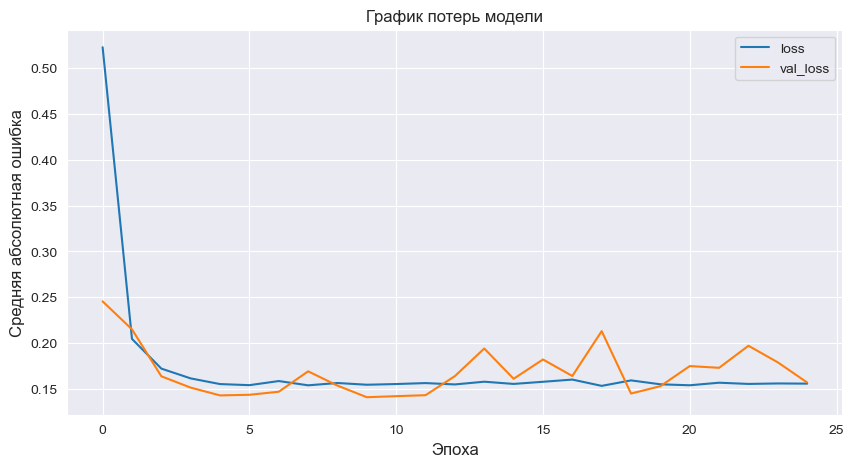

In [66]:
# Построение графика ошибки MAE - mean_absolute_error
model_loss_plot(history_RFM, graf_name_path = r'save_fig\fig_block4_neuro\model_loss_MAE.png')

9/9 [==============================] - 0s 1ms/step


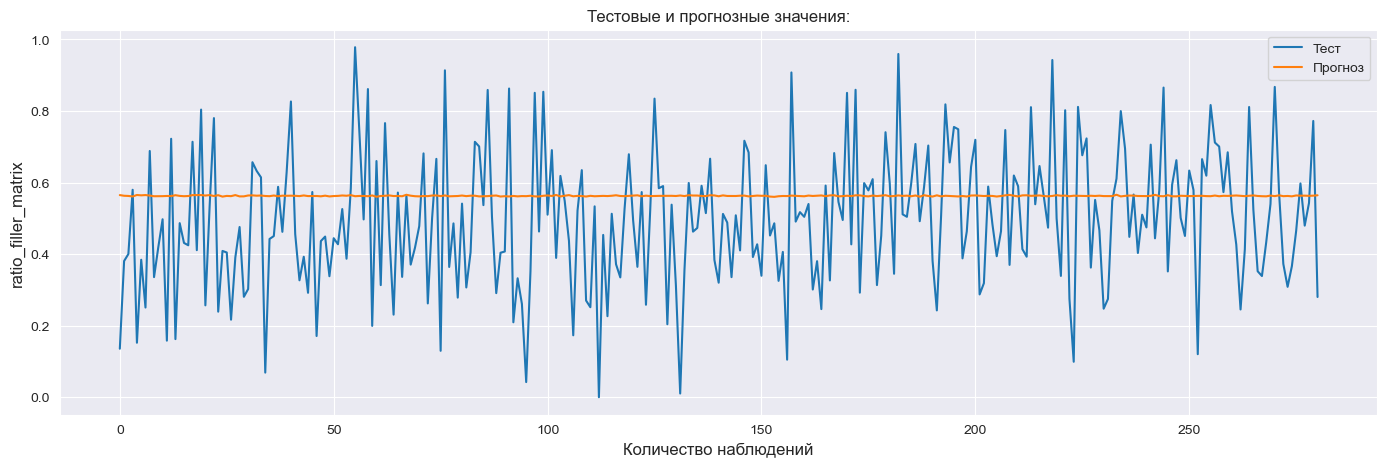

In [67]:
# Динамическая оценка модели    
y_pred_RFM = model_RFM.predict(np.array((X_test_RFM)))
actual = y_test_RFM.values
predicted = y_pred_RFM

# Построение графика Оценки модели Тест/Прогноз
actual_predict_plot(actual, predicted, 'ratio_filler_matrix', model_RFM, 
                    graf_name_path = r'save_fig\fig_block4_neuro\test_predict_model.png')

In [42]:
y_pred_RFM.shape

(281, 1)

In [43]:
# Выводим перве 5 значений нашего предсказанного моделью model_RFM значения целевой переменной
# для сравнения с  результатами из записаной и загруженой вновь модели
y_pred_RFM[:5]

array([[0.58931637],
       [0.5886423 ],
       [0.58884555],
       [0.5884703 ],
       [0.5891692 ]], dtype=float32)

In [44]:
# Сохранение модели в папку
model_RFM.save(r'data_storage\data_block4_neuro\model_RFM') 

INFO:tensorflow:Assets written to: data_storage\data_block4_neuro\model_RFM\assets


In [45]:
# Чтение сохраненой модели из папки
model_RFM = keras.models.load_model(r'data_storage\data_block4_neuro\model_RFM')
model_RFM.predict(X_test_RFM)[:5] # проверка загруженой модели- совпадает с рабочей!

9/9 [==============================] - 0s 2ms/step


array([[0.58931637],
       [0.5886423 ],
       [0.58884555],
       [0.5884703 ],
       [0.5891692 ]], dtype=float32)

In [ ]:
# Результаты совпали с данными полученными перед сохранением модели  в папку

In [ ]:
# конец Блока № 4 Создана нейронная сеть по прогнозированию
# целевого парметра 'ratio_filler_matrix' RFM - Соотношение матрица-наполнитель